## 6.4 Machine Learning
1. Importing libraries and data
2. Data cleaning
3. Dat prep for regression analysis
4. Regression analysis
5. Bonus:performance improvment after removing outliers

## 1. Importing libraries and data

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [116]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [118]:
path = 'C:/Users/olivi/OneDrive/Documents/Data Analytics/Data Analytics Immersion'

In [120]:
df = pd.read_csv(os.path.join(path, 'Boat Sales Analysis' , '02 Data' , 'Prepared Data' , 'boat_data_assignment_3.csv'))

## 2. Data Cleaning

In [123]:
df.columns

Index(['Unnamed: 0', 'Currency', 'Price', 'Boat Type', 'Manufacturer', 'Type',
       'Year Built', 'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days'],
      dtype='object')

In [132]:
df.rename(columns = {'Unnamed: 0' : 'Date'}, inplace = True)

In [136]:
df.drop(columns=['Date'], inplace=True)

In [138]:
df.head(20)

,Currency,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,EUR,3490,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,Germany,75
1,CHF,3770,Sport Boat,Marine power boats,new boat from stock,2005,3.69,1.42,Aluminium,Switzerland,124
2,EUR,3399,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,Germany,58
3,CHF,3650,Sport Boat,Linder power boats,new boat from stock,2005,4.03,1.56,Aluminium,Switzerland,132
4,CHF,3500,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,Switzerland,239
5,CHF,3480,Fishing Boat,Marine power boats,new boat from stock,2005,4.13,1.41,Aluminium,Switzerland,145
6,EUR,3500,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,Italy,69
7,CHF,4600,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,Switzerland,113
8,CHF,4500,Fishing Boat,Italmarine power boats,"Used boat,Unleaded",1997,3.72,1.33,Aluminium,Switzerland,413
9,CHF,4400,Deck Boat,Buster power boats,"new boat from stock,Unleaded",2005,3.88,1.49,Aluminium,Switzerland,263


Missing values

In [141]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Currency                       0
Price                          0
Boat Type                      0
Manufacturer                   0
Type                           0
Year Built                     0
Length                         0
Width                          0
Material                       0
Location                       0
Number of views last 7 days    0
dtype: int64

Duplicates check

In [144]:
dups = df.duplicated()

In [146]:
dups.shape # No dups

(6771,)

Extreme values check

C:\Users\olivi\AppData\Local\Temp\ipykernel_3776\2611428201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'], bins=25)


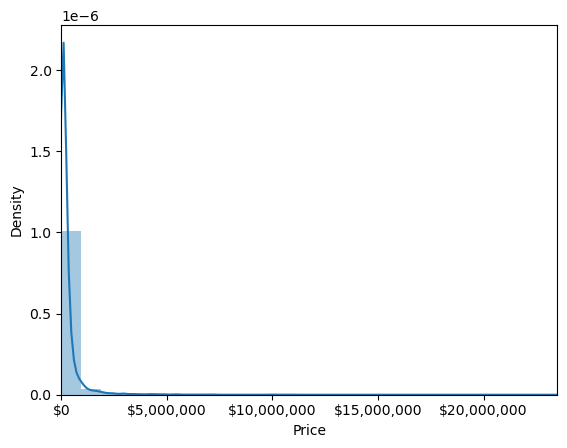

In [149]:
# Plot the distribution
sns.distplot(df['Price'], bins=25)

# Format the x-axis to show currency
plt.gca().xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Cap the x-axis at 10 million
plt.xlim(0, 23_500_000)

# Show the plot
plt.show()
# Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [151]:
df['Price'].mean() # Check the mean

274661.87343080784

In [153]:
df['Price'].median() # Check the median

90000.0

In [155]:
df['Price'].max() # Check the max

23500000

## 3. Data prep for regression analysis

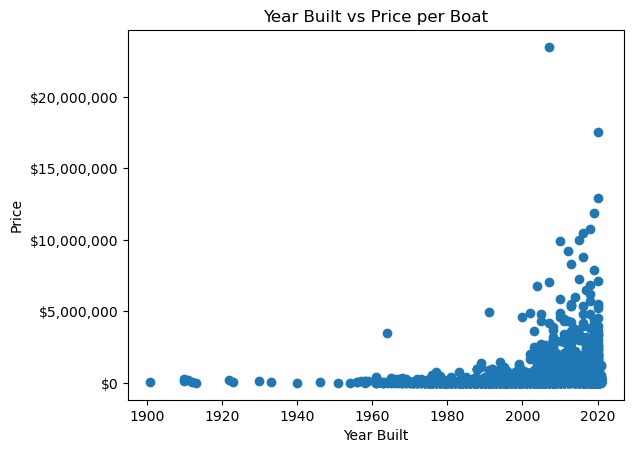

In [177]:
# Create a scatterplot
df.plot(x='Year Built', y='Price', style='o', legend=False)  # Scatterplot

# Add title and labels
plt.title('Year Built vs Price per Boat')
plt.xlabel('Year Built')
plt.ylabel('Price')

# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

# Show the plot
plt.show()


In [179]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Year Built'].values.reshape(-1,1)
Y = df['Price'].values.reshape(-1,1)

In [181]:
X

array([[2020],
       [2005],
       [2019],
       ...,
       [1984],
       [2020],
       [2019]], dtype=int64)

In [183]:
Y

array([[3490],
       [3770],
       [3399],
       ...,
       [4950],
       [4499],
       [3780]], dtype=int64)

In [185]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression analysis

Hypothesis: Boat prices increase as the year of manufacture increases. Null Hypothesis (H₀): There is no relationship between the year a boat was built and its price. Alternative Hypothesis (H₁): There is a positive relationship between the year a boat was built and its price, i.e., newer boats tend to have higher prices.

In [188]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [190]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [192]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

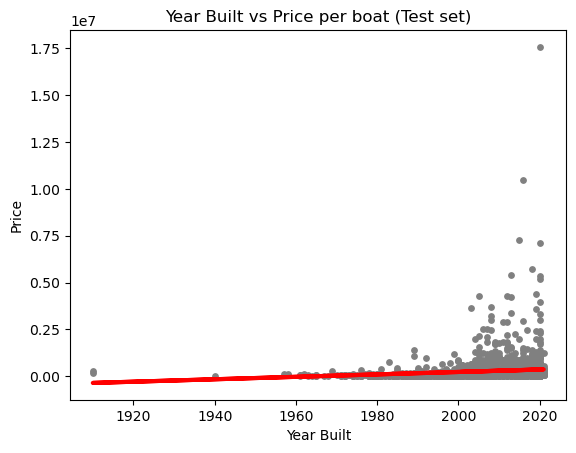

In [194]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Year Built vs Price per boat (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Price')
plot_test.show()

In [196]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [198]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6504.21848357]]
Mean squared error:  482766906838.98145
R2 score:  0.018792213776574807


In [200]:
y_predicted

array([[239572.17948384],
       [363152.33067169],
       [200546.86858241],
       ...,
       [246076.39796741],
       [200546.86858241],
       [356648.11218812]])

In [202]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,17000,239572.179484
1,5208850,363152.330672
2,18400,200546.868582
3,25000,135504.683747
4,21000,337135.456737
5,79900,337135.456737
6,134500,363152.330672
7,54640,363152.330672
8,79500,252580.616451
9,170000,194042.650099


Compare how the regression fits the training set

In [205]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [207]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [209]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[6504.21848357]]
Mean squared error:  591014240154.8419
R2 score:  0.0106939512895885


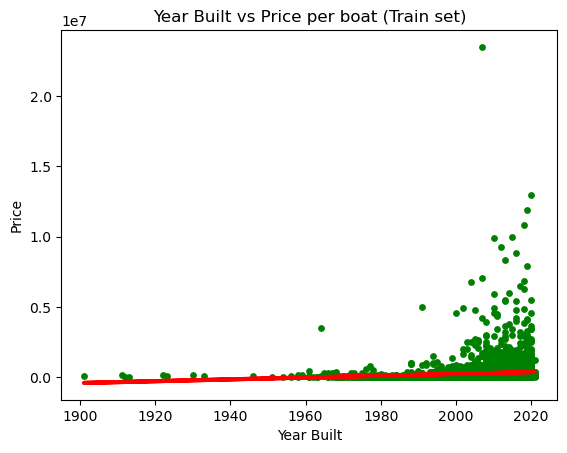

In [211]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Year Built vs Price per boat (Train set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Price')
plot_test.show()

The slope tells us how much the dependent variable (like the price of a boat) changes for every unit increase in the independent variable (like material type). Here, the slope is about 6504, meaning that for every unit increase in the independent variable, the predicted price increases by 6504.

The mean squared error (MSE) measures how far the predicted prices are from the actual prices. In this case, the MSE is very large for both the training and test sets, which means our predictions are far off from the real values. A smaller MSE would indicate the model is doing a better job.

The R² score shows how much of the price variation can be explained by the independent variable. Scores close to 1 mean the model describes the variation well, while scores close to 0 mean the model doesn't explain much. The training and test R² scores are very close to 0, which suggests the model doesn’t do a good job of predicting prices based on the material.5885

# Bonus: performance improvement after removing outliers

In [216]:
# Clean the extreme values from the "Price per Unit" variable observed during the consistency checks.

df_test = df[df['Price'] <=2000000]

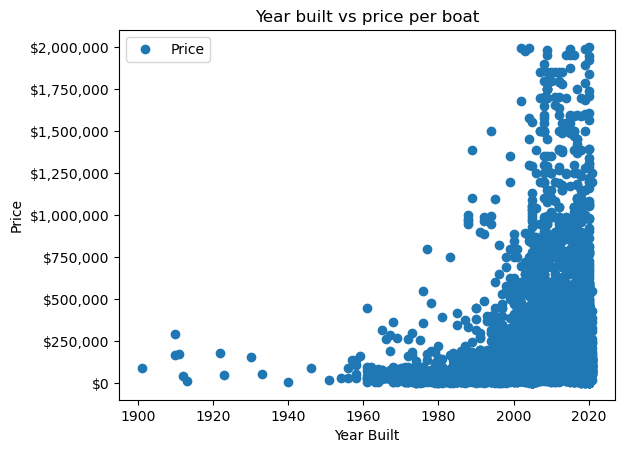

In [220]:
# See how the scatterplot looks without outliers.

df_test.plot(x = 'Year Built', y='Price', style='o')  
plt.title('Year built vs price per boat')  
plt.xlabel('Year Built')  
plt.ylabel('Price')  

# Format the y-axis to show currency
plt.gca().yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

plt.show()

In [222]:
# Reshape again.

X_2 = df_test['Year Built'].values.reshape(-1,1)
y_2 = df_test['Price'].values.reshape(-1,1)

In [224]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=0)

In [226]:
# Run and fit the regression.

regression = LinearRegression()  
regression.fit(X_train_2, y_train_2)

LinearRegression()

In [228]:
# Predict.

y_predicted_2 = regression.predict(X_test_2)

In [230]:
rmse = mean_squared_error(y_test_2, y_predicted_2)
r2 = r2_score(y_test_2, y_predicted_2)

In [232]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[3492.65065186]]
Mean squared error:  80325274779.68367
R2 score:  0.02228459481828171


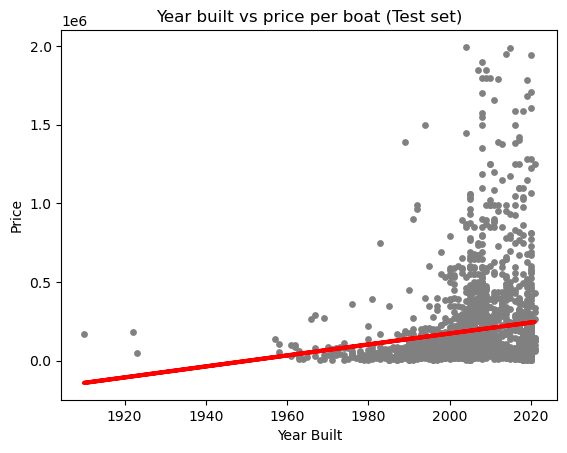

In [234]:
# Visualizing the test set results.
plot_test = plt
plot_test.scatter(X_test_2, y_test_2, color='gray', s = 15)
plot_test.plot(X_test_2, y_predicted_2, color='red', linewidth =3)
plot_test.title('Year built vs price per boat (Test set)')
plot_test.xlabel('Year Built')
plot_test.ylabel('Price')
plot_test.show()

In [236]:
data = pd.DataFrame({'Actual': y_test_2.flatten(), 'Predicted': y_predicted_2.flatten()})
data.head(30)

,Actual,Predicted
0,165000,211618.573656
1,208500,190662.669745
2,59000,159228.813878
3,89500,190662.669745
4,38000,197647.971049
5,247000,229081.826915
6,199000,190662.669745
7,85000,138272.909967
8,469000,239559.778871
9,299500,222096.525612


In [238]:
df.to_csv(os.path.join(path, '02 Data' , 'Prepared Data' , 'boat_data_assignment_4.csv'))